# Exploratory Data Analysis (EDA) example

This notebook will run through some of the basic analyses that you would typically do during EDA to get to know your data better. In this example, we will use data on the daily temperature in major global cities that can be downloaded from here: 
https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

The data were originally sourced from the National Climatic Data Center, compiled by the University of Dayton. More info and data descriptions and documentation can be found here:
https://academic.udayton.edu/kissock/http/Weather/default.htm

I've added the `city_temperature.csv` file to the `data` folder in the course repository.

In [1]:
# load in the packages you will need for your analysis

import pandas as pd  # pandas is a package for data analysis and manipulation
import seaborn as sns  # seaborn is a data visualization package

import matplotlib.pyplot as plt # matplotlib is the OG python plotting library and really useful for formatting 

In [2]:
# load in the csv file with cities temperatures

# set the path to the correct directory for your particular computer
infile = '../data/city_temperature.csv'

# read in the .csv file with the column separator explicitly defined
data = pd.read_csv(infile, sep = ',')

/Users/sclayton/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# convert the temperature data from F to C
# assign to a new column in the dataframe called 'AvgTemperatureC'
data['AvgTemperatureC'] = (data.AvgTemperature - 32) * 5/9

In [4]:
# print the information about the data in the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Region           object 
 1   Country          object 
 2   State            object 
 3   City             object 
 4   Month            int64  
 5   Day              int64  
 6   Year             int64  
 7   AvgTemperature   float64
 8   AvgTemperatureC  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 199.6+ MB


In [5]:
# the shape of the data
# nrows, ncols

data.shape

(2906327, 9)

In [6]:
# total number of datapoints in the dataframe
# ncol * nrows

data.size

26156943

In [7]:
# gives a list of the column names in the dataframe

data.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature', 'AvgTemperatureC'],
      dtype='object')

In [8]:
# descriptive statistics for the numeric data in the dataframe

data.describe()

,Month,Day,Year,AvgTemperature,AvgTemperatureC
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01,1.333607e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01,1.784644e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01,-7.277778e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01,7.666667e+00
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01,1.694444e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01,2.416667e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02,4.333333e+01


In [9]:
# correlations between the different numeric data columns in the dataframe

data.corr()

,Month,Day,Year,AvgTemperature,AvgTemperatureC
Month,1.000000,0.011209,-0.026898,0.075037,0.075037
Day,0.011209,1.000000,-0.002213,0.000100,0.000100
Year,-0.026898,-0.002213,1.000000,0.087245,0.087245
AvgTemperature,0.075037,0.000100,0.087245,1.000000,1.000000
AvgTemperatureC,0.075037,0.000100,0.087245,1.000000,1.000000


In [10]:
# get a list of the unique values found in the 'City' column of the dataframe
data['City'].unique()

# assign the list of unique values of 'City' to a new variable called 'cities'
cities = data['City'].unique()

In [11]:
print(cities[99:112])

['Bucharest' 'Moscow' 'Yerevan' 'Pristina' 'Bratislava' 'Barcelona'
 'Bilbao' 'Madrid' 'Stockholm' 'Bern' 'Geneva' 'Zurich' 'Kiev']


In [12]:
# Group the data by a particular column
# In this case, the data is grouped by country, and I am only interested in the 'City' column

data.groupby('Country')['City'].unique()

Country
Albania                                             [Tirana]
Algeria                                            [Algiers]
Argentina                                     [Buenos Aires]
Australia     [Brisbane, Canberra, Melbourne, Perth, Sydney]
Austria                                             [Vienna]
                                   ...                      
Uzbekistan                                        [Tashkent]
Venezuela                                          [Caracas]
Vietnam                                              [Hanoi]
Yugoslavia                                        [Belgrade]
Zambia                                              [Lusaka]
Name: City, Length: 125, dtype: object

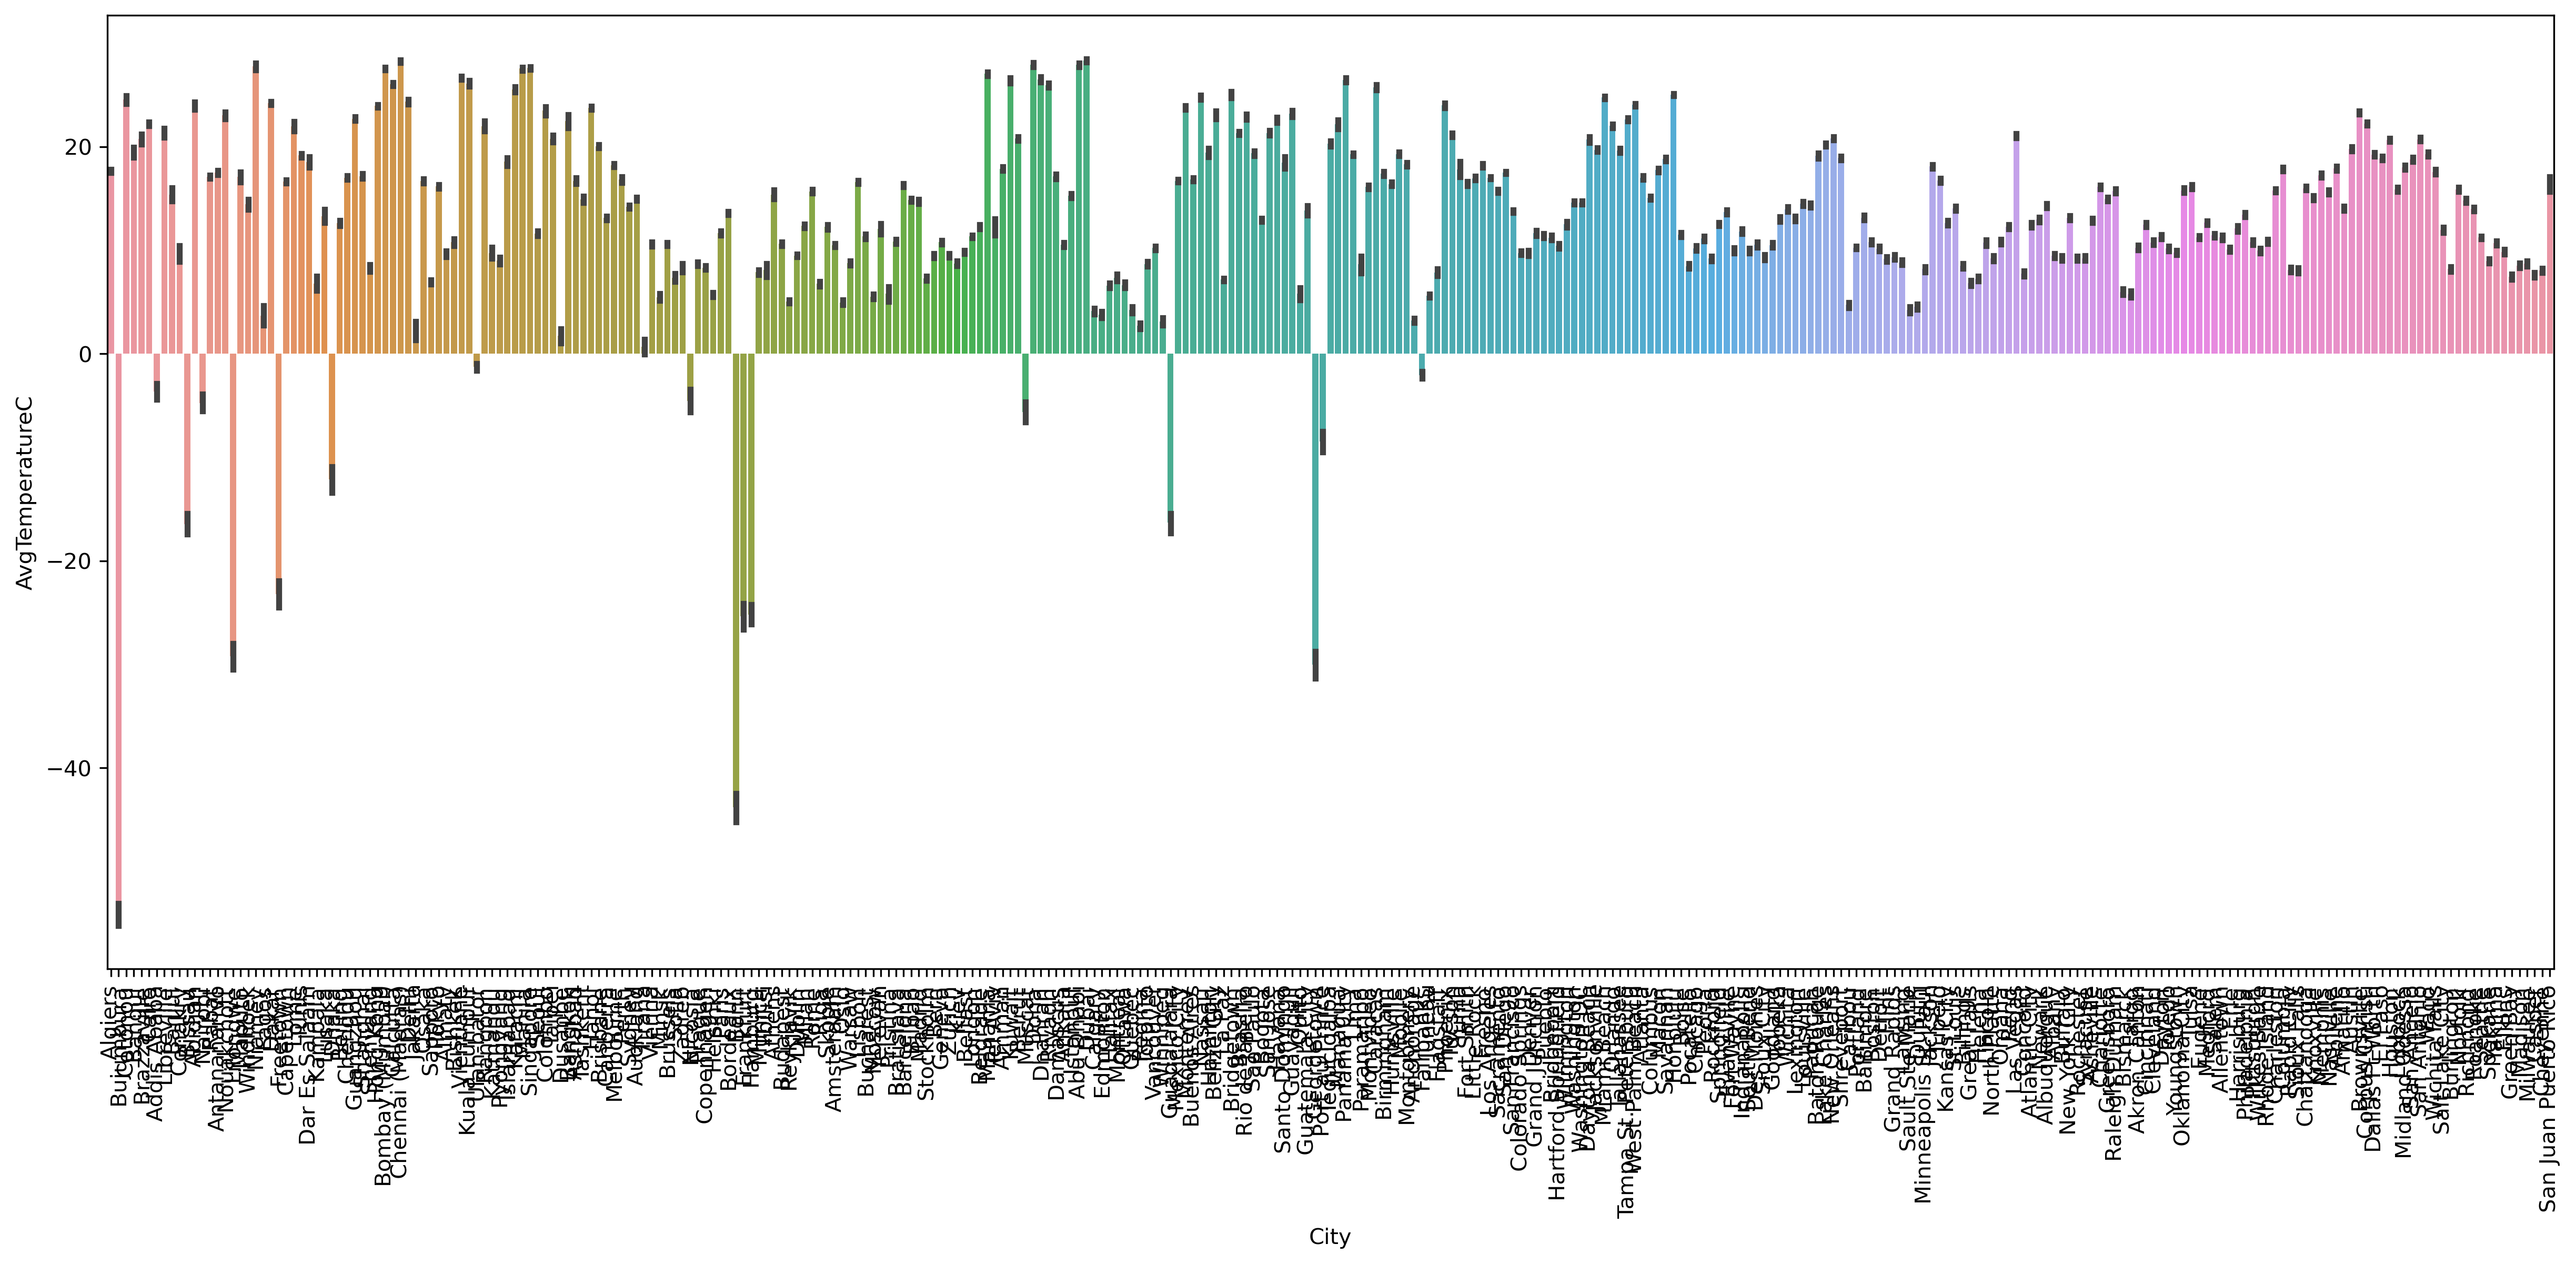

In [13]:
fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = data, x = 'City', y = 'AvgTemperatureC')
ax.tick_params(axis='x', rotation=90)

In [14]:
data.Year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])